# LAB 02: Data mining and visualization

### Team information

Class : 22KHDL

|Student's ID| Name |
|------------|--------------|
|22127460| Quách Trần Quán Vinh|
|22127478| Nguyễn Hoàng Trung Kiên|

### Import libraries

- Libraries to handle and visualize data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd
import matplotlib.ticker as ticker

## 1. Data collection and preprocessing

### 1.1. Collecting data

### 1.2. Preprocessing data

- Read data 

In [2]:
df = pd.read_excel('data/P_environment.xlsx')
df

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,2.9222,1.0161,7.8257,8.3465,7.5276,8.0661,7.932,7.2491,7.0541,7.9308,8.2599,8.7073
1,Afghanistan,AFG,Nitrous oxide (N2O) emissions (total) excludin...,EN.GHG.N2O.MT.CE.AR5,2.0316,2.4473,3.8005,3.8415,3.9607,4.4631,3.9337,3.9491,3.6824,3.5777,3.5457,3.557
2,Afghanistan,AFG,Methane (CH4) emissions (total) excluding LULU...,EN.GHG.CH4.MT.CE.AR5,7.6437,10.4209,15.5429,14.9348,14.8077,14.773,15.2334,15.2741,15.3417,15.507,16.1232,16.4523
3,Afghanistan,AFG,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,12.5616,13.9157,27.4201,27.4083,26.634,27.6919,27.5533,26.9828,26.6463,27.6431,28.6141,29.4601
4,Afghanistan,AFG,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.PC.CE.AR5,1.042832,0.69128,0.836169,0.810135,0.767537,0.775924,0.749892,0.712772,0.682032,0.69107,0.705148,0.710657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8249,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is read in the excel format.

There are two final lines of the data has data information, so we will drop those two lines.

In [3]:
df = df.iloc[:-2]

We convert each ```Series Name``` value into each column

In [4]:
df_long = pd.melt(
    df,
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    value_vars=[col for col in df.columns if "YR" in col],
    var_name="Year",
    value_name="Value"
)

df_long_clean = df_long.dropna(subset=["Country Name", "Country Code", "Series Name"]).copy()
df = df_long_clean.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value",
    aggfunc="first" 
).reset_index()
df.columns.name = None

- Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 34 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Country Name                                                                                      3192 non-null   object
 1   Country Code                                                                                      3192 non-null   object
 2   Year                                                                                              3192 non-null   object
 3   Access to clean fuels and technologies for cooking (% of population)                              3192 non-null   object
 4   Access to clean fuels and technologies for cooking, rural (% of rural population)                 3192 non-null   object
 5   Access

In [6]:
df.shape

(3192, 34)

The raw data now has 3192 rows and 34 columns.

- Data columns

In [7]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Year',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: consumption of fixed capital (% of GNI)',
       'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
   

- Handle duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

There are no duplicates.

- Handle missing values

Through the dataset, some missing values instead of being represented by ```NaN```, they are represented by ```..```, so we convert them into ```NaN```.

In [9]:
pd.set_option('future.no_silent_downcasting', True)
df.replace('..', np.nan, inplace=True)
df.isna().sum()

Country Name                                                                                           0
Country Code                                                                                           0
Year                                                                                                   0
Access to clean fuels and technologies for cooking (% of population)                                 822
Access to clean fuels and technologies for cooking, rural (% of rural population)                    822
Access to clean fuels and technologies for cooking, urban (% of urban population)                    822
Adjusted net savings, including particulate emission damage (% of GNI)                              1391
Adjusted savings: carbon dioxide damage (% of GNI)                                                   815
Adjusted savings: consumption of fixed capital (% of GNI)                                            806
Annual freshwater withdrawals, agriculture (% of total 

So there are some missing values in some columns.

We remove the columns that have missing proportion higher than 50%.

In [10]:
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold, inplace=True)

To handle missing values, we first identify which columns have below or above 10% missing values. If columns have low missing values, we just fill them by ```median```. The other we fill them by ```Iterative Imputer``` with ```Random Forest Regressor``` estimator.

**Reasons:**
- Low missing columns' distribution will not be affected much when filling by ```median```.
- Most of the columns have high missing values, and their distribution may vary.
- The columns are continous variable so it is suitable to fill with ```Random Forest Regressor``` estimator.

We convert and make sure year is in ```int``` type first.

In [11]:
df_encoded = df.copy()
df_encoded['Year'] = df_encoded['Year'].str.extract(r'(\d{4})').astype(int)

Encode ```Country Name``` and ```Country Code``` using ```LabelEncoder```.

In [12]:
label_encoders = {}
for col in ['Country Name', 'Country Code']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 

We calculate missing ratio of each columns and define whether they are high or low missing columns.

In [13]:
missing_ratio = df_encoded.isnull().mean()
low_missing_cols = missing_ratio[missing_ratio <= 0.1].index  
high_missing_cols = missing_ratio[missing_ratio > 0.1].index 

Fill low missing columns by ```median```.

In [14]:
df_encoded[low_missing_cols] = df_encoded[low_missing_cols].fillna(df_encoded[low_missing_cols].median())

Scale columns using ```Standard Scaler``` to fill the other columns by ```Iterative Imputer```.

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

Fill the remain missing columns by ```Iterative Imputer``` with ```Random Forest Regressor``` estimator.

In [16]:
df_numeric = pd.DataFrame(df_scaled, columns=df_encoded.columns)

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1),
    max_iter=5,
    random_state=42  
)
df_imputed = imputer.fit_transform(df_numeric)  
df_final = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_encoded.columns)

for col in ['Country Name', 'Country Code']:
    df_final[col] = df_final[col].round().astype(int)  
    df_final[col] = label_encoders[col].inverse_transform(df_final[col])

df = df_final.copy()

C:\Users\Ping\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Check the missing values again.

In [17]:
df.isna().sum()

Country Name                                                                                        0
Country Code                                                                                        0
Year                                                                                                0
Access to clean fuels and technologies for cooking (% of population)                                0
Access to clean fuels and technologies for cooking, rural (% of rural population)                   0
Access to clean fuels and technologies for cooking, urban (% of urban population)                   0
Adjusted net savings, including particulate emission damage (% of GNI)                              0
Adjusted savings: carbon dioxide damage (% of GNI)                                                  0
Adjusted savings: consumption of fixed capital (% of GNI)                                           0
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)     

The data now has no missing values.

- Handle data format

We take a look through the data types.

In [18]:
df.dtypes

Country Name                                                                                         object
Country Code                                                                                         object
Year                                                                                                float64
Access to clean fuels and technologies for cooking (% of population)                                float64
Access to clean fuels and technologies for cooking, rural (% of rural population)                   float64
Access to clean fuels and technologies for cooking, urban (% of urban population)                   float64
Adjusted net savings, including particulate emission damage (% of GNI)                              float64
Adjusted savings: carbon dioxide damage (% of GNI)                                                  float64
Adjusted savings: consumption of fixed capital (% of GNI)                                           float64
Annual freshwater withdrawal

When looking through the data, we see that ```Year``` column is in ```float``` type, we remove it and convert it into ```int``` type.

In [19]:
df['Year'] = df['Year'].astype(int)

### Data after being preprocessed

In [20]:
df

,Country Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,1990,32.123333,15.82024,77.629515,15.231344,1.132992,6.407092,98.914854,...,73.514796,93.683270,23.000000,3914.272858,47.15000,17.721045,25.819081,12.5616,1.042832,1.511283
1,Afghanistan,AFG,2000,5.500000,0.80000,25.300000,6.775047,4.749595,6.665288,98.606201,...,19.745178,54.606478,45.000000,2342.237163,47.15000,21.818115,27.309064,13.9157,0.691280,0.306013
2,Afghanistan,AFG,2014,26.100000,10.20000,78.000000,10.499794,0.799648,7.774864,98.169627,...,52.247964,82.142599,19.100000,1437.827763,47.15000,22.941825,23.828327,27.4201,0.836169,0.929913
3,Afghanistan,AFG,2015,27.600000,11.40000,79.500000,11.049284,1.025318,7.670384,98.169627,...,55.089416,84.441678,17.700000,1393.660703,47.15000,22.833371,23.552171,27.4083,0.810135,0.943409
4,Afghanistan,AFG,2016,28.800000,12.60000,80.500000,11.733850,1.045826,7.181729,98.169627,...,57.970101,86.755310,20.200000,1358.765661,47.15000,0.104707,0.100000,26.6340,0.767537,0.964733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Zimbabwe,ZWE,2019,30.300000,6.70000,78.800000,5.664455,2.231775,8.864952,84.826632,...,48.871548,93.029902,81.000000,802.809545,12.26000,27.214747,27.214750,28.3694,1.857686,4.867751
3188,Zimbabwe,ZWE,2020,30.500000,6.90000,78.600000,1.454492,2.112573,9.377614,87.200183,...,48.282429,92.895129,84.100000,789.598019,12.26000,27.214747,27.214750,26.7706,1.724145,3.871768
3189,Zimbabwe,ZWE,2021,30.500000,7.10000,78.400000,6.751851,1.805455,9.856066,87.200183,...,47.695513,92.760319,82.400000,776.086410,12.26000,27.214747,27.214746,28.8784,1.828070,4.199630
3190,Zimbabwe,ZWE,2022,30.800000,7.20000,78.200000,-1.217667,1.592296,9.165168,66.548671,...,47.695513,92.760319,75.163333,5022.697627,66.57335,27.214747,27.214747,29.8254,1.856077,17.576437


Store data into csv.

In [21]:
df.to_csv('./data/Environment Data Preprocessed.csv')

In [22]:
df

,Country Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,1990,32.123333,15.82024,77.629515,15.231344,1.132992,6.407092,98.914854,...,73.514796,93.683270,23.000000,3914.272858,47.15000,17.721045,25.819081,12.5616,1.042832,1.511283
1,Afghanistan,AFG,2000,5.500000,0.80000,25.300000,6.775047,4.749595,6.665288,98.606201,...,19.745178,54.606478,45.000000,2342.237163,47.15000,21.818115,27.309064,13.9157,0.691280,0.306013
2,Afghanistan,AFG,2014,26.100000,10.20000,78.000000,10.499794,0.799648,7.774864,98.169627,...,52.247964,82.142599,19.100000,1437.827763,47.15000,22.941825,23.828327,27.4201,0.836169,0.929913
3,Afghanistan,AFG,2015,27.600000,11.40000,79.500000,11.049284,1.025318,7.670384,98.169627,...,55.089416,84.441678,17.700000,1393.660703,47.15000,22.833371,23.552171,27.4083,0.810135,0.943409
4,Afghanistan,AFG,2016,28.800000,12.60000,80.500000,11.733850,1.045826,7.181729,98.169627,...,57.970101,86.755310,20.200000,1358.765661,47.15000,0.104707,0.100000,26.6340,0.767537,0.964733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Zimbabwe,ZWE,2019,30.300000,6.70000,78.800000,5.664455,2.231775,8.864952,84.826632,...,48.871548,93.029902,81.000000,802.809545,12.26000,27.214747,27.214750,28.3694,1.857686,4.867751
3188,Zimbabwe,ZWE,2020,30.500000,6.90000,78.600000,1.454492,2.112573,9.377614,87.200183,...,48.282429,92.895129,84.100000,789.598019,12.26000,27.214747,27.214750,26.7706,1.724145,3.871768
3189,Zimbabwe,ZWE,2021,30.500000,7.10000,78.400000,6.751851,1.805455,9.856066,87.200183,...,47.695513,92.760319,82.400000,776.086410,12.26000,27.214747,27.214746,28.8784,1.828070,4.199630
3190,Zimbabwe,ZWE,2022,30.800000,7.20000,78.200000,-1.217667,1.592296,9.165168,66.548671,...,47.695513,92.760319,75.163333,5022.697627,66.57335,27.214747,27.214747,29.8254,1.856077,17.576437


## 2. Data visualization

### 2.1. Data introduction

#### 2.1.1. Introduction

#### 2.1.2. Sample size

In [23]:
df.shape

(3192, 31)

The data now has 3192 rows and 31 columns.

#### 2.1.3. Structures

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 31 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country Name                                                                                      3192 non-null   object 
 1   Country Code                                                                                      3192 non-null   object 
 2   Year                                                                                              3192 non-null   int64  
 3   Access to clean fuels and technologies for cooking (% of population)                              3192 non-null   float64
 4   Access to clean fuels and technologies for cooking, rural (% of rural population)                 3192 non-null   float64
 5  

**Meaning of each columns:**

| # | Column Name                         | Description |
|--|--------------------------------------|-------------|
|1| `Country Name`                       | Country's name |
|2| `Country Code`                       | Country's Code |
|3| `Year`                               | Year |
|4| `Access to clean fuels and technologies for cooking (% of population)` | Access to clean fuels and technologies for cooking is the proportion of total population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|5| `Access to clean fuels and technologies for cooking, rural (% of rural population) ` | Access to clean fuels and technologies for cooking, rural is the proportion of rural population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|6| `Access to clean fuels and technologies for cooking, urban (% of urban population)` | Access to clean fuels and technologies for cooking, urban is the proportion of urban population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|7| `Adjusted net savings, including particulate emission damage (% of GNI)` | Adjusted net savings are equal to net national savings plus education expenditure and minus energy depletion, mineral depletion, net forest depletion, and carbon dioxide and particulate emissions damage |
|8| `Adjusted savings: carbon dioxide damage (% of GNI)` | Cost of damage due to carbon dioxide emissions from fossil fuel use and the manufacture of cement, estimated to be US$40 per ton of CO2 (the unit damage in 2017 US dollars for CO2 emitted in 2020) times the number of tons of CO2 emitted |
|9| `Adjusted savings: consumption of fixed capital (% of GNI)` | Consumption of fixed capital represents the replacement value of capital used up in the process of production |
|10| `Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture are total withdrawals for irrigation and livestock production. Data are for the most recent year available for 1987-2002 |
|11| `Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|12| `Annual freshwater withdrawals, industry (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for industry are total withdrawals for direct industrial use (including withdrawals for cooling thermoelectric plants). Data are for the most recent year available for 1987-2002 |
|13| `Annual freshwater withdrawals, total (% of internal resources)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture and industry are total withdrawals for irrigation and livestock production and for direct industrial use (including withdrawals for cooling thermoelectric plants). Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|14| `Annual freshwater withdrawals, total (billion cubic meters)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture and industry are total withdrawals for irrigation and livestock production and for direct industrial use (including withdrawals for cooling thermoelectric plants). Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|15| `Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|16| `Forest area (% of land area)` | Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens |
|17| `Forest area (sq. km)` | Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens |
|18| `GDP (current US$)` | GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used |
|19| `Level of water stress: freshwater withdrawal as a proportion of available freshwater resources` | The level of water stress: freshwater withdrawal as a proportion of available freshwater resources is the ratio between total freshwater withdrawn by all major sectors and total renewable freshwater resources, after taking into account environmental water requirements. Main sectors, as defined by ISIC standards, include agriculture; forestry and fishing; manufacturing; electricity industry; and services. This indicator is also known as water withdrawal intensity |
|20| `Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of methane (CH4), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|21| `Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of nitrous oxide (N2O), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|22| `People using at least basic drinking water services, rural (% of rural population)` | The percentage of people using at least basic water services.  This indicator encompasses both people using basic water services as well as those using safely managed water services.  Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip.  Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water |
|23| `People using at least basic drinking water services, urban (% of urban population)` | The percentage of people using at least basic water services.  This indicator encompasses both people using basic water services as well as those using safely managed water services.  Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip.  Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water |
|24| `Renewable energy consumption (% of total final energy consumption)` | Renewable energy consumption is the share of renewables energy in total final energy consumption |
|25| `Renewable internal freshwater resources per capita (cubic meters)` | Renewable internal freshwater resources flows refer to internal renewable resources (internal river flows and groundwater from rainfall) in the country. Renewable internal freshwater resources per capita are calculated using the World Bank's population estimates |
|26| `Renewable internal freshwater resources, total (billion cubic meters)` | Renewable internal freshwater resources flows refer to internal renewable resources (internal river flows and groundwater from rainfall) in the country |
|27| `Terrestrial and marine protected areas (% of total territorial area)` | Terrestrial protected areas are totally or partially protected areas of at least 1,000 hectares that are designated by national authorities as scientific reserves with limited public access, national parks, natural monuments, nature reserves or wildlife sanctuaries, protected landscapes, and areas managed mainly for sustainable use. Marine protected areas are areas of intertidal or subtidal terrain--and overlying water and associated flora and fauna and historical and cultural features--that have been reserved by law or other effective means to protect part or all of the enclosed environment. Sites protected under local or provincial law are excluded |
|28| `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)` | A measure of annual emissions of the six greenhouse gases (GHG) covered by the Kyoto Protocol (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphurhexafluoride (SF6)) from the energy, industry, waste, and agriculture sectors, standardized to carbon dioxide equivalent values. This measure excludes GHG fluxes caused by Land Use Change Land Use and Forestry (LULUCF), as these fluxes have larger uncertainties. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|29| `Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)` | Total annual emissions of the six greenhouse gases (GHG) covered by the Kyoto Protocol (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphurhexafluoride (SF6)) from the energy, industry, waste, and agriculture sectors, standardized to carbon dioxide equivalent values divided by the economy's population. This measure excludes GHG fluxes caused by Land Use Change Land Use and Forestry (LULUCF), as these fluxes have larger uncertainties |
|30| `Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)` | Water productivity is calculated as GDP in constant prices divided by annual total water withdrawal |

#### 2.1.4. Statistics description

In [25]:
df.describe()

,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,...,3192.000000,3192.000000,3.192000e+03,3.192000e+03,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,2014.583333,61.723251,49.234958,75.241494,7.922163,1.705945,12.656296,58.297042,26.984935,15.268779,...,80.009910,94.219910,3.014847e+01,1.477199e+04,1641.265767,13.361265,17.862605,1660.044117,6.488851,60.932508
std,9.368594,33.038228,37.562012,29.030958,9.298423,1.458629,5.067474,26.732592,21.126121,17.827164,...,19.068990,7.160303,2.679792e+01,3.945596e+04,5045.537103,12.476812,9.840782,5546.602910,8.618284,138.543012
min,1990.000000,0.000000,0.000000,0.000000,-81.622369,0.003926,0.620608,0.000000,0.303951,0.000000,...,5.685182,48.064237,3.552714e-15,-1.818989e-12,0.000000,0.000000,0.000000,0.001000,0.040639,0.219313
25%,2014.750000,37.308564,15.599661,65.383370,3.319536,0.904997,8.874375,45.195621,12.676004,4.640922,...,72.121624,92.893483,8.610000e+00,1.300979e+03,7.100000,5.268233,12.363375,10.135925,2.003176,10.659862
50%,2017.500000,61.394495,39.108445,83.792661,7.950697,1.265930,12.235206,63.371372,22.362199,9.535595,...,85.711499,96.525168,2.210000e+01,3.955820e+03,55.050000,12.251891,16.681103,46.460900,4.278793,21.816649
75%,2020.250000,97.392901,94.700000,99.300000,13.400403,2.123086,16.295539,77.008597,34.744947,17.025632,...,95.378332,98.887928,4.750000e+01,1.388633e+04,356.916000,17.337324,22.442758,377.611875,8.011105,54.436381
max,2023.000000,100.000000,100.000000,100.000000,59.728953,26.208558,48.034024,99.696049,164.673913,96.421796,...,100.000000,100.000000,9.790000e+01,6.671219e+05,42808.602100,99.957456,62.500000,52962.900859,153.588046,1500.047031


- Numeric columns distribution

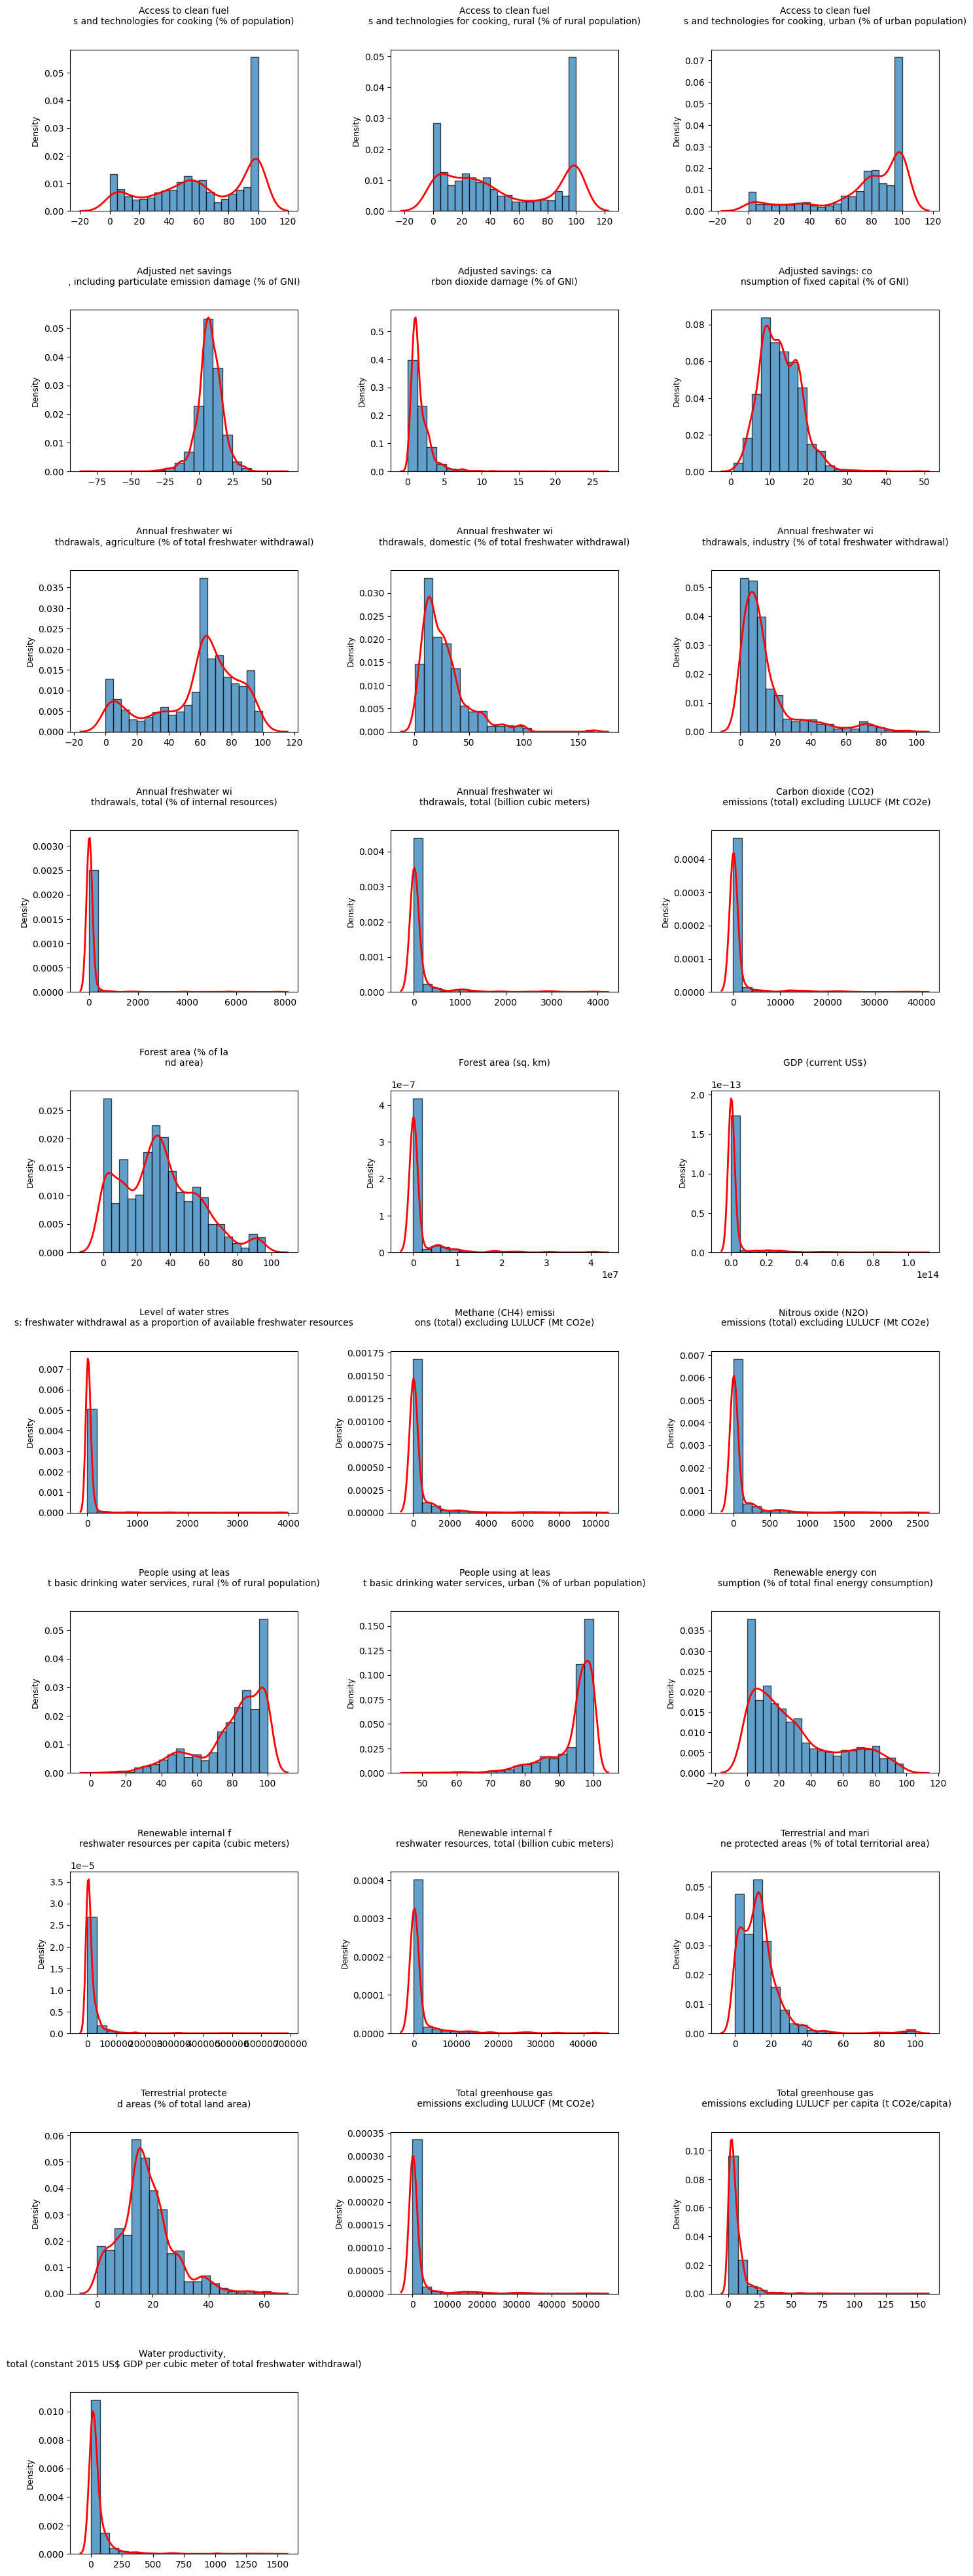

In [26]:
df_numeric = df.drop(columns=['Country Name', 'Country Code', 'Year'])

numeric_cols = df_numeric.columns
num_cols = len(numeric_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, i + 1)
    plt.hist(df_numeric[col], bins=20, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(df_numeric[col], color='red', linewidth=2)
    
    if len(col) > 20:
        col_title = col[:20] + '\n' + col[20:]  
    else:
        col_title = col
        
    plt.title(col_title, fontsize=10, pad=10, y=1.1)
    plt.ylabel('Density', fontsize=9)
    plt.xlabel('')

plt.tight_layout(pad=3.0)
plt.show()


### 2.2. Visualization objectives

There are 2 members in our team, so we decide to derive 6 objectives:

#### 1. How gases emission ($CO_2$, $N_2O$ and $CH_4$) affects the greenhouse effect?

**Benefits**
- Helps climate researchers understand the causes of climate change, which is crucial for developing effective mitigation strategies.
- Supports industries and businesses in understanding their impact and adopting cleaner technologies.

**Features used in data**

- `Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)`
- `Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)`
- `Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)`
- `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)`

#### 2. Which regions or continents contribute the most to global GHG emissions in 2023?

**Benefits**
- Assists international organizations in prioritizing emission reduction policies and global climate agreements.
- Helps researchers analyze trends in emissions and develop regional strategies for sustainable development.

**Features used in data**

- `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)`
- `Country Name`
- `Country Code`

#### 3. What is the status of deforestation over years around the world?

**Benefits**
- Supports conservation efforts by identifying areas at high risk of forest loss.

- Helps governments and NGOs measure the impact of deforestation on climate change, biodiversity, and local communities.

**Features used in data**  
- `Forest area (% of land area)`
- `Forest area (sq. km)`
- `Terrestrial and marine protected areas (% of total territorial area)`
- `Year`

#### 4. Which area has the most effective environmental protection policies?

**Benefits**
- Allows governments to learn from successful environmental policies and implement similar measures.
- Helps investors and businesses identify regions with strong sustainability practices for eco-friendly investments.

**Features used in data**
- `Access to clean fuels and technologies for cooking (% of population)`
- `Access to clean fuels and technologies for cooking, rural (% of rural population)`
- `Access to clean fuels and technologies for cooking, urban (% of urban population)`
- `Renewable energy consumption (% of total final energy consumption)`

#### 5. Do high-income countries tend to incur high costs due to emission damage?

**Benefits**
- Helps economists assess the financial burden of climate change on different economies.
- Encourages businesses and policymakers to invest in green technologies to minimize long-term costs.

**Features used in data**
- `Adjusted savings: carbon dioxide damage (% of GNI)`
- `Adjusted net savings, including particulate emission damage (% of GNI)`
- `GDP (current US$)`

#### 6. What is the current status of water supply (Freshwater used on daily basis, level of water stress)?

**Benefits**
- Helps governments and water management authorities develop better water distribution and conservation plans.
- Supports humanitarian efforts to ensure access to clean water in water-stressed regions.
- Analyze the amount of freshwater is used on daily basis.

**Features used in data**
- `Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)`
- `Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)`
- `Annual freshwater withdrawals, industry (% of total freshwater withdrawal)`
- `Annual freshwater withdrawals, total (% of internal resources)`
- `Annual freshwater withdrawals, total (billion cubic meters)`
- `Renewable internal freshwater resources per capita (cubic meters)`
- `Renewable internal freshwater resources, total (billion cubic meters)`

### 2.3. Analyzing objectives

#### 1. How gases emission ($CO_2$, $N_2O$ and $CH_4$) affects the greenhouse effect?

In [27]:
cols_to_avg = [
    'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
    'Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)',
    'Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)'
]

df_grouped = df.groupby('Year')[cols_to_avg + ['Total greenhouse gas emissions excluding LULUCF (Mt CO2e)']].mean()
df_grouped.columns = ['CO2', 'CH4', 'N2O', 'Total Emissions']

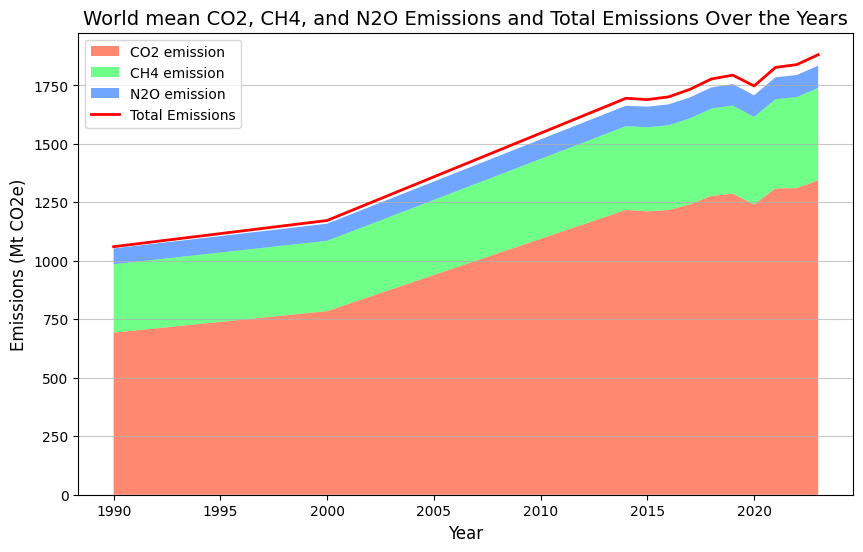

In [28]:
plt.figure(figsize=(10, 6))
plt.stackplot(df_grouped.index, df_grouped['CO2'], df_grouped['CH4'], df_grouped['N2O'],
              labels=['CO2 emission', 'CH4 emission', 'N2O emission'], colors=['#FF5733', '#33FF57', '#3380FF'], alpha=0.7)

plt.plot(df_grouped.index, df_grouped['Total Emissions'], label='Total Emissions', color='red', linewidth=2, linestyle='-')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emissions (Mt CO2e)', fontsize=12)
plt.title('World mean CO2, CH4, and N2O Emissions and Total Emissions Over the Years', fontsize=14)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

#### 2. Which regions or continents contribute the most to global GHG emissions in 2023?

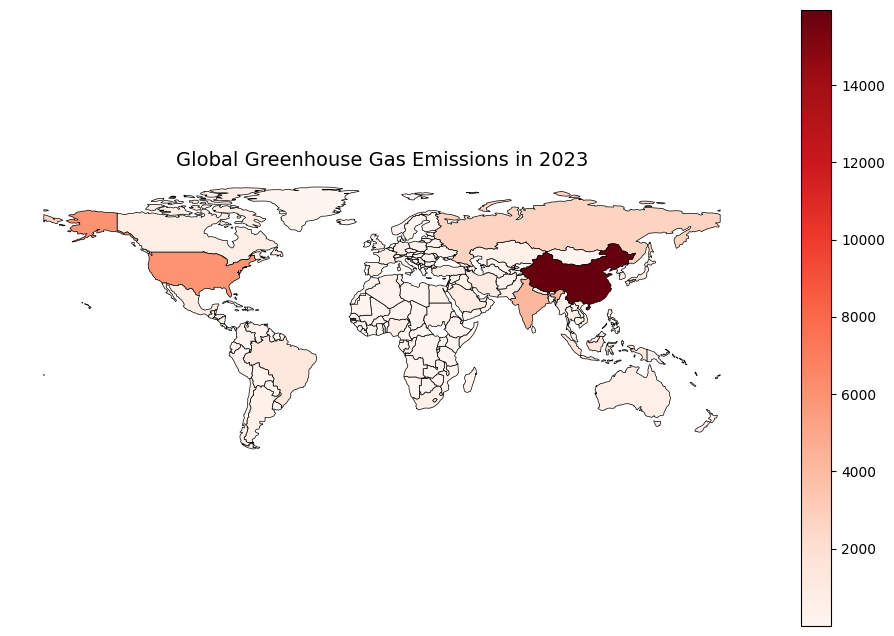

In [ ]:
shapefile_path = ".data/geo_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
world = world.rename(columns={"ADM0_A3": "Country Code"})

df_2023 = df[df['Year'] == 2023]

merged = world.merge(df_2023, on="Country Code", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(
    column="Total greenhouse gas emissions excluding LULUCF (Mt CO2e)",
    cmap="Reds",
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Global Greenhouse Gas Emissions in 2023", fontsize=14)
ax.axis("off")
plt.show()

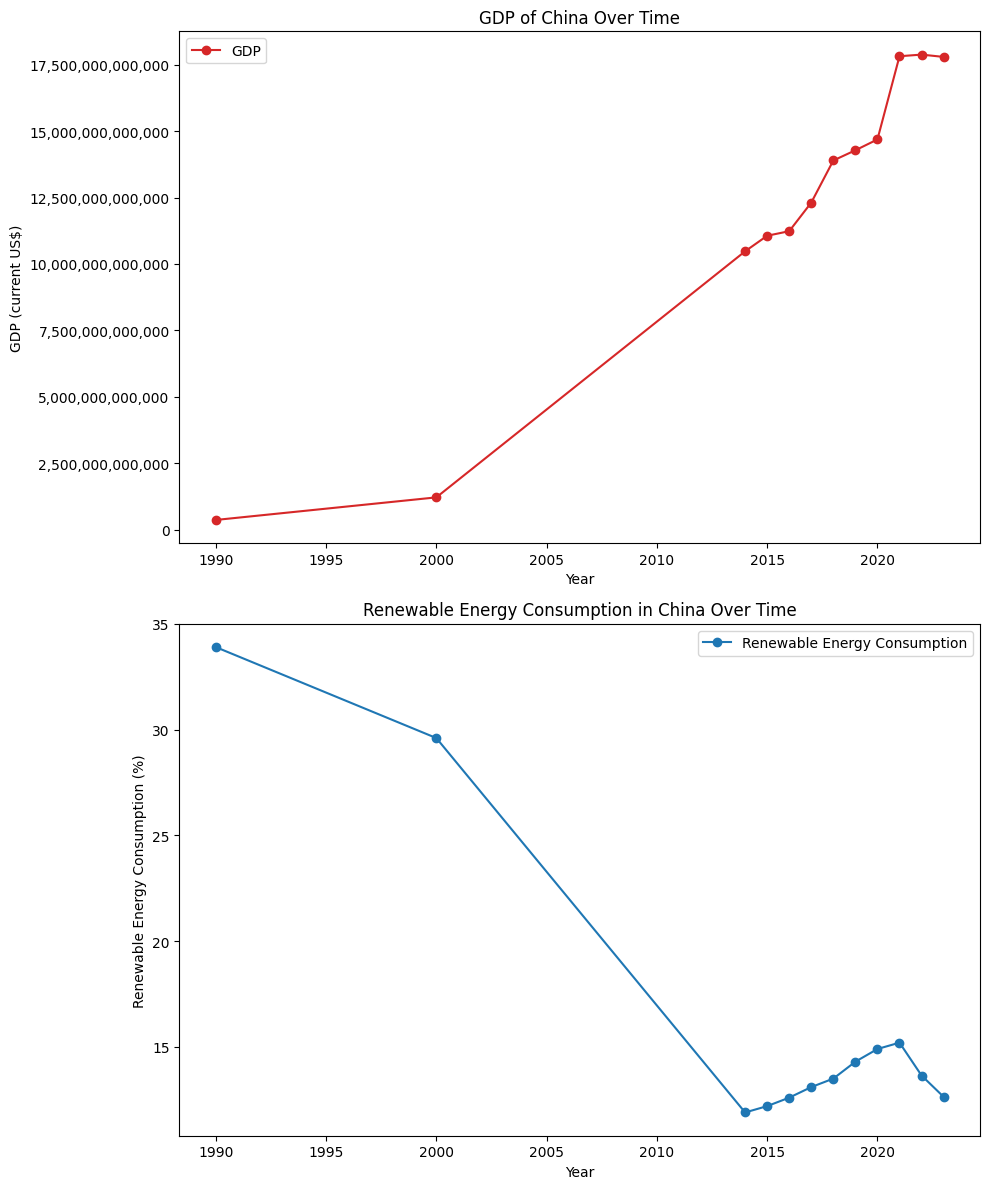

In [ ]:


china_data = df[df['Country Name'] == 'China'].copy()  
china_data['Year'] = china_data['Year'].astype(int)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

ax1.plot(china_data['Year'], china_data['GDP (current US$)'], color='tab:red', marker='o', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (current US$)')
ax1.set_title('GDP of China Over Time')
ax1.legend()

ax2.plot(china_data['Year'], china_data['Renewable energy consumption (% of total final energy consumption)'], color='tab:blue', marker='o', label='Renewable Energy Consumption')
ax2.set_xlabel('Year')
ax2.set_ylabel('Renewable Energy Consumption (%)')
ax2.set_title('Renewable Energy Consumption in China Over Time')
ax2.legend()
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

#### 3. What is the status of deforestation over years around the world?